In [9]:
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

# EX 1

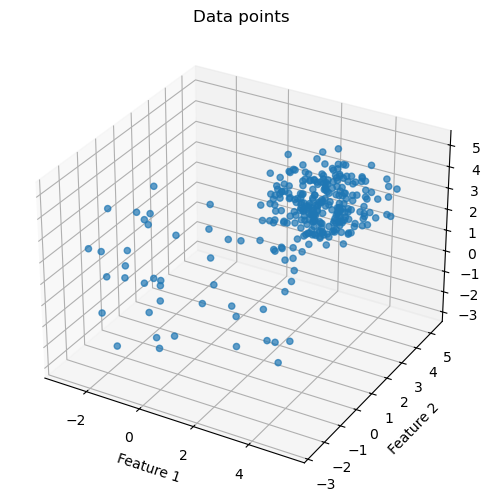

(300, 3)


In [44]:
x_train, x_test, y_train, y_test = generate_data(
    n_train=300,
    n_test=200,
    n_features=3,
    contamination=0.15,
    random_state=9000
)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    x_train[:, 0],
    x_train[:, 1],
    x_train[:, 2],
    s=20,
    alpha=0.7
)

ax.set_title("Data points")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

plt.show()

In [45]:

def deepSVDD(x_train):
    model = DeepSVDD(contamination=0.15,
                     epochs=100,
                     batch_size=32,
                     verbose=True,
                     n_features=x_train.shape[1],)
    model.fit(x_train)

    scores_test = model.decision_function(x_test)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    return scores_test, y_pred_test, y_pred_train

def ocsvm(x_train,kernel = 'linear'):
    model = OCSVM(contamination=0.15, kernel=kernel)
    model.fit(x_train)

    scores_test = model.decision_function(x_test)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    return scores_test, y_pred_test, y_pred_train

scores_test, y_pred_test, y_pred_train = ocsvm(x_train,kernel='linear')

ba_score = balanced_accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, scores_test)

print("Balanced accuracy:", ba_score)
print("ROC AUC:", roc_auc)

Balanced accuracy: 0.9578431372549019
ROC AUC: 0.9988235294117647


In [46]:

def plot4axes(x_train, x_test, y_train, y_test, model_name):
    fig = plt.figure(figsize=(14, 10))

    # train ground truth
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')

    # inliers (y_train == 0)
    ax1.scatter(
        x_train[y_train == 0, 0],
        x_train[y_train == 0, 1],
        x_train[y_train == 0, 2],
        c='blue',
        s=15,
        alpha=0.7,
        label='Inlier'
    )

    # outliers (y_train == 1)
    ax1.scatter(
        x_train[y_train == 1, 0],
        x_train[y_train == 1, 1],
        x_train[y_train == 1, 2],
        c='red',
        s=20,
        alpha=0.8,
        label='Outlier'
    )

    ax1.set_title("Train - Ground truth")
    ax1.set_xlabel("Feature 1")
    ax1.set_ylabel("Feature 2")
    ax1.set_zlabel("Feature 3")
    ax1.legend()


    # test ground truth
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')

    ax2.scatter(
        x_test[y_test == 0, 0],
        x_test[y_test == 0, 1],
        x_test[y_test == 0, 2],
        c='blue',
        s=15,
        alpha=0.7,
        label='Inlier'
    )

    ax2.scatter(
        x_test[y_test == 1, 0],
        x_test[y_test == 1, 1],
        x_test[y_test == 1, 2],
        c='red',
        s=20,
        alpha=0.8,
        label='Outlier'
    )

    ax2.set_title("Test - Ground truth")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")
    ax2.set_zlabel("Feature 3")
    ax2.legend()

    # train predictions
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')

    ax3.scatter(
        x_train[y_pred_train == 0, 0],
        x_train[y_pred_train == 0, 1],
        x_train[y_pred_train == 0, 2],
        c='green',
        s=15,
        alpha=0.7,
        label='Pred inlier'
    )

    ax3.scatter(
        x_train[y_pred_train == 1, 0],
        x_train[y_pred_train == 1, 1],
        x_train[y_pred_train == 1, 2],
        c='orange',
        s=20,
        alpha=0.8,
        label='Pred outlier'
    )

    ax3.set_title(f"Train - {model_name} predictions")
    ax3.set_xlabel("Feature 1")
    ax3.set_ylabel("Feature 2")
    ax3.set_zlabel("Feature 3")
    ax3.legend()

    # test predictions
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')

    ax4.scatter(
        x_test[y_pred_test == 0, 0],
        x_test[y_pred_test == 0, 1],
        x_test[y_pred_test == 0, 2],
        c='green',
        s=15,
        alpha=0.7,
        label='Pred inlier'
    )

    ax4.scatter(
        x_test[y_pred_test == 1, 0],
        x_test[y_pred_test == 1, 1],
        x_test[y_pred_test == 1, 2],
        c='orange',
        s=20,
        alpha=0.8,
        label='Pred outlier'
    )

    ax4.set_title(f"Test - {model_name} predictions")
    ax4.set_xlabel("Feature 1")
    ax4.set_ylabel("Feature 2")
    ax4.set_zlabel("Feature 3")
    ax4.legend()

    plt.tight_layout()
    plt.show()


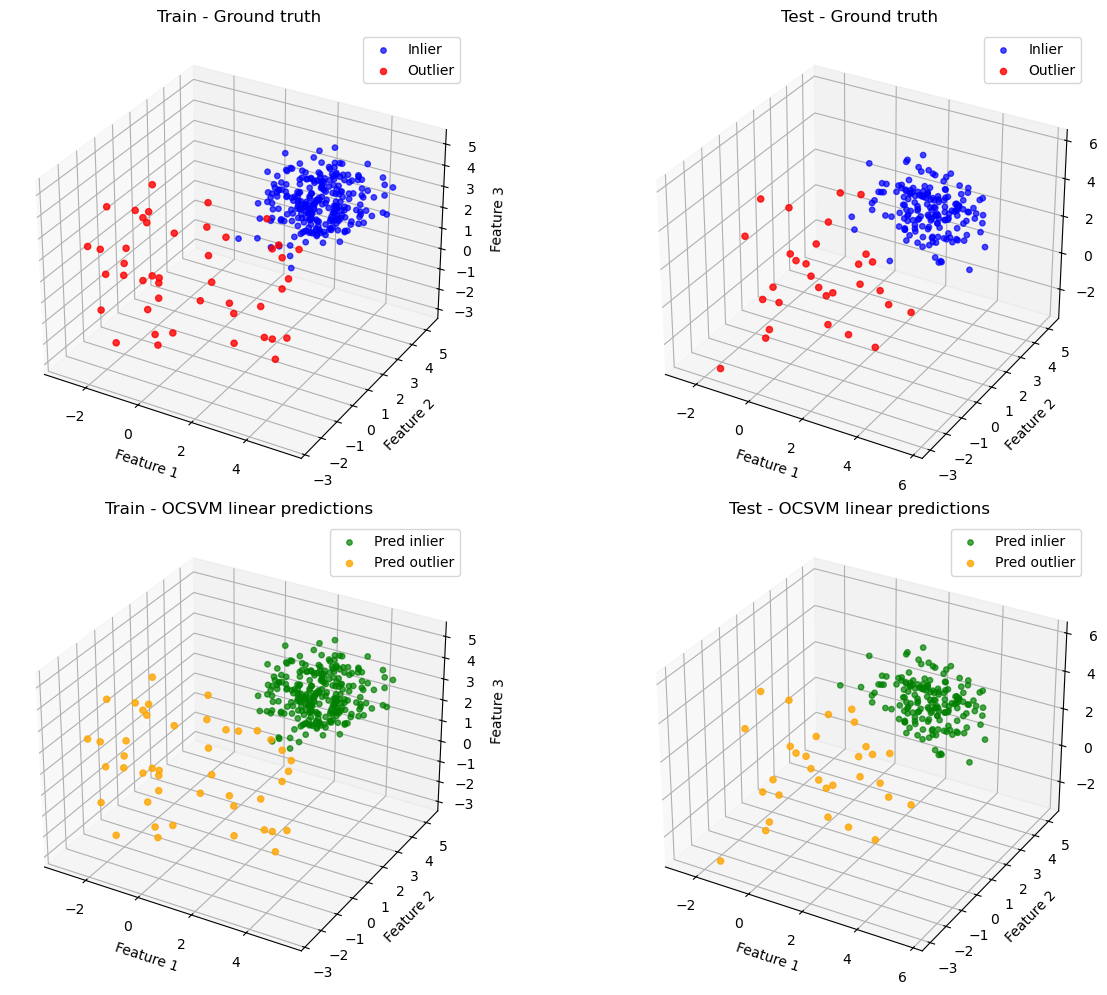

In [47]:
plot4axes(x_train, x_test, y_train, y_test,"OCSVM linear")

In [48]:
scores_test, y_pred_test, y_pred_train = ocsvm(x_train,kernel='rbf')

ba_score = balanced_accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, scores_test)

print("Balanced accuracy:", ba_score)
print("ROC AUC:", roc_auc)

Balanced accuracy: 0.9705882352941176
ROC AUC: 0.9976470588235294


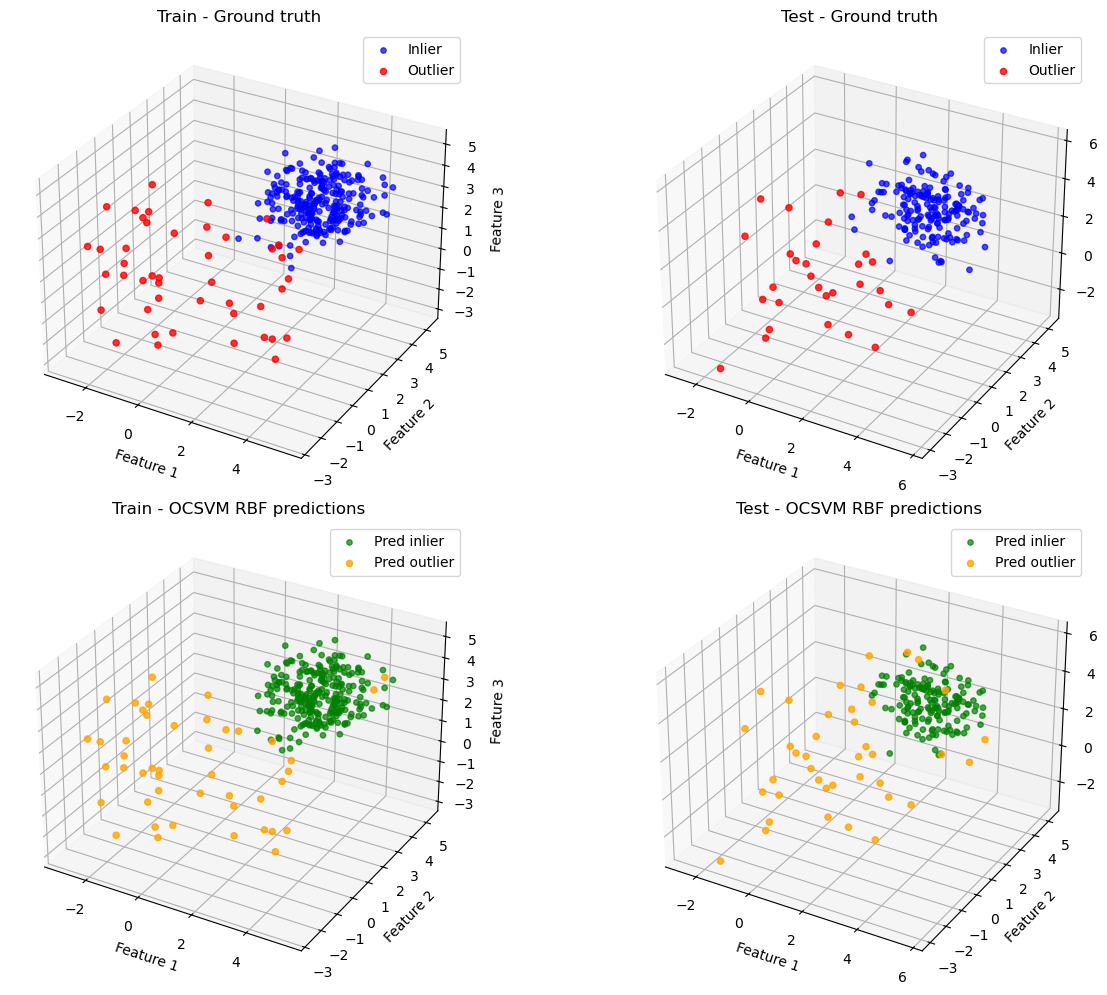

In [49]:
plot4axes(x_train, x_test, y_train, y_test, "OCSVM RBF")

In [52]:
scores_test, y_pred_test, y_pred_train = deepSVDD(x_train)

ba_score = balanced_accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, scores_test)

print("Balanced accuracy:", ba_score)
print("ROC AUC:", roc_auc)

Epoch 1/100, Loss: 8.912890791893005
Epoch 2/100, Loss: 9.352144330739975
Epoch 3/100, Loss: 8.945893108844757
Epoch 4/100, Loss: 9.63790214061737
Epoch 5/100, Loss: 8.880470097064972
Epoch 6/100, Loss: 8.864534854888916
Epoch 7/100, Loss: 9.084983080625534
Epoch 8/100, Loss: 9.106034368276596
Epoch 9/100, Loss: 8.995930910110474
Epoch 10/100, Loss: 8.632825881242752
Epoch 11/100, Loss: 8.765197396278381
Epoch 12/100, Loss: 9.370715618133545
Epoch 13/100, Loss: 8.64030408859253
Epoch 14/100, Loss: 8.671309918165207
Epoch 15/100, Loss: 9.166859745979309
Epoch 16/100, Loss: 8.797368228435516
Epoch 17/100, Loss: 8.787712812423706
Epoch 18/100, Loss: 9.23491257429123
Epoch 19/100, Loss: 8.787457466125488
Epoch 20/100, Loss: 8.997326731681824
Epoch 21/100, Loss: 9.45833295583725
Epoch 22/100, Loss: 8.57710012793541
Epoch 23/100, Loss: 9.370411455631256
Epoch 24/100, Loss: 8.67037558555603
Epoch 25/100, Loss: 8.638910621404648
Epoch 26/100, Loss: 8.906037390232086
Epoch 27/100, Loss: 9.14892

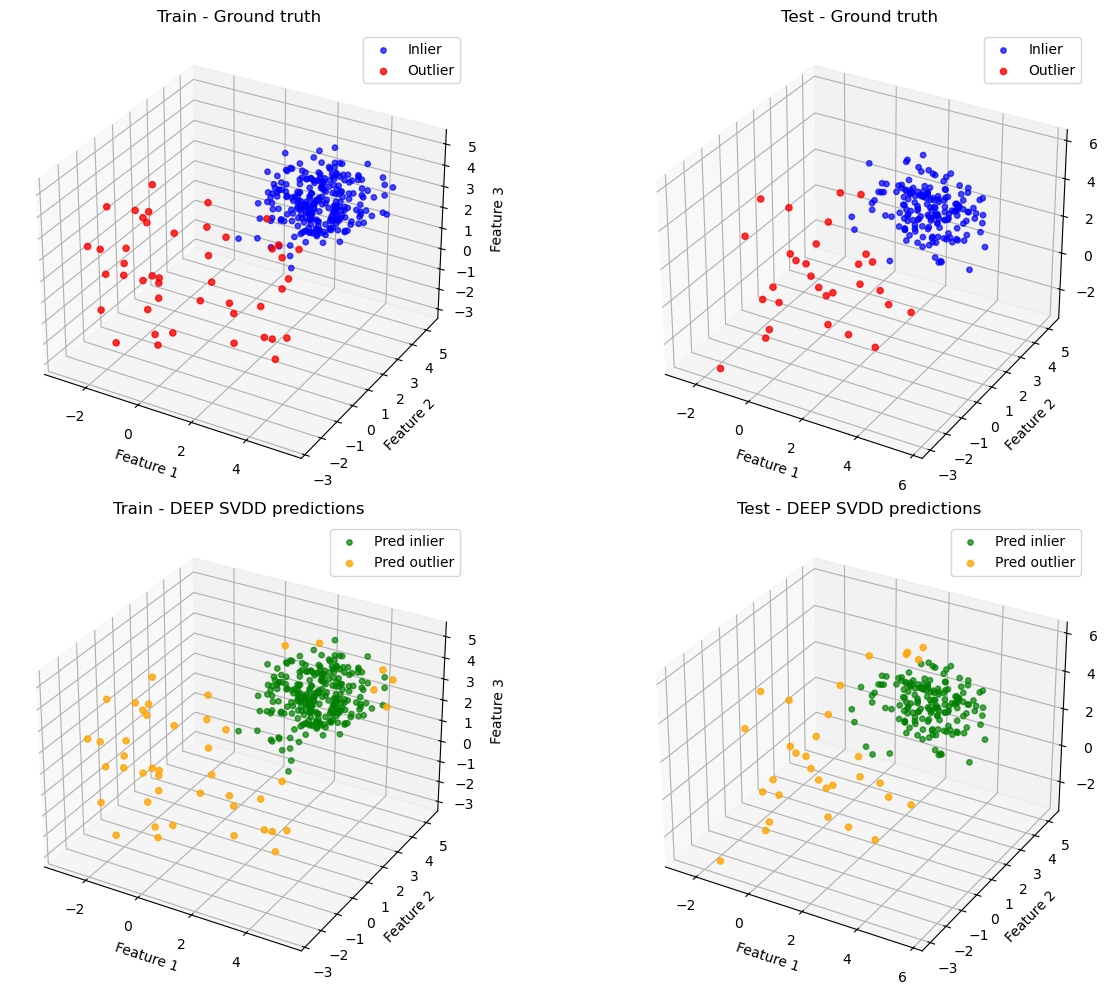

In [53]:
plot4axes(x_train, x_test, y_train, y_test, "DEEP SVDD")

# EX 2

In [16]:
data = loadmat("cardio.mat")
x = data["X"]
y = data["y"].ravel().astype(int)
y = np.where(y == 0, 1, -1)


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4, random_state=9000, stratify=y)
contamination = np.mean(y_train == -1)
print(contamination)

0.09562841530054644


In [17]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", OneClassSVM())
])

param_grid = [
    {"svm__kernel": ["linear"], "svm__nu": [0.02,0.08,contamination, 0.12, 0.15, 0.18, 0.2,0.25]},
    {"svm__kernel": ["rbf", "poly", "sigmoid"],
     "svm__nu": [0.02,0.08,contamination, 0.12, 0.15, 0.18, 0.2,0.25],
     "svm__gamma": [0.001, 0.005,0.01, 0.02, 0.05, 0.06,0.07,0.08,0.09, 0.1,0.2]},
]

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring=make_scorer(balanced_accuracy_score),
    cv=5,
    n_jobs=-1,
)

grid.fit(x_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
bal_acc = balanced_accuracy_score(y_test, y_pred)

print("Best parameters:", grid.best_params_)
print(f"Test Balanced Accuracy: {bal_acc:.8f}")

Best parameters: {'svm__gamma': 0.001, 'svm__kernel': 'rbf', 'svm__nu': 0.25}
Test Balanced Accuracy: 0.89489635
